In [1]:
# import libraries

#Plotting 
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time
import ta
import datetime as dt

#Data Processing
from pyspark.sql import *
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window
from pyspark.sql import functions as F
from matplotlib import pyplot as plt
from pylab import rcParams

# Spark.ml
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import RandomForestRegressionModel
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml import Pipeline

In [2]:
# File location and type
file_location = "/FileStore/tables/AAPL__2_-1028f.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

Date,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400
1980-12-19,0.504464,0.506696,0.504464,0.504464,0.022607,12157600
1980-12-22,0.529018,0.531250,0.529018,0.529018,0.023707,9340800
1980-12-23,0.551339,0.553571,0.551339,0.551339,0.024708,11737600
1980-12-24,0.580357,0.582589,0.580357,0.580357,0.026008,12000800
1980-12-26,0.633929,0.636161,0.633929,0.633929,0.028409,13893600


In [3]:
# File location and type
file_location = "/FileStore/tables/GSPC.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_sp = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df_sp)

Date,Open,High,Low,Close,Adj Close,Volume
1980-12-12,127.360001,129.979996,127.150002,129.229996,129.229996,39530000
1980-12-15,129.229996,131.330002,128.639999,129.449997,129.449997,39700000
1980-12-16,129.449997,131.220001,128.330002,130.600006,130.600006,41630000
1980-12-17,130.600006,133.589996,130.220001,132.889999,132.889999,50800000
1980-12-18,132.889999,135.899994,131.889999,133.000000,133.000000,69570000
1980-12-19,133.000000,134.000000,131.800003,133.699997,133.699997,50770000
1980-12-22,133.699997,136.679993,132.880005,135.779999,135.779999,51950000
1980-12-23,135.779999,137.479996,134.009995,135.300003,135.300003,55260000
1980-12-24,135.300003,136.550003,134.149994,135.880005,135.880005,29490000
1980-12-26,135.880005,137.020004,135.199997,136.570007,136.570007,16130000


In [4]:
# join two table together
df = df.join(df_sp, df.Date == df_sp.Date).select(df.High,df.Volume,df.Close,df.Date,df.Low,df_sp.Close.alias('sp'))

In [5]:
display(df)

High,Volume,Close,Date,Low,sp
0.515625,117258400,0.513393,1980-12-12,0.513393,129.229996
0.488839,43971200,0.486607,1980-12-15,0.486607,129.449997
0.453125,26432000,0.450893,1980-12-16,0.450893,130.600006
0.464286,21610400,0.462054,1980-12-17,0.462054,132.889999
0.477679,18362400,0.475446,1980-12-18,0.475446,133.000000
0.506696,12157600,0.504464,1980-12-19,0.504464,133.699997
0.531250,9340800,0.529018,1980-12-22,0.529018,135.779999
0.553571,11737600,0.551339,1980-12-23,0.551339,135.300003
0.582589,12000800,0.580357,1980-12-24,0.580357,135.880005
0.636161,13893600,0.633929,1980-12-26,0.633929,136.570007


In [6]:
# Select dataframe for future use, name it as df2
df1 = df.select(df.Date.cast("timestamp"),df.Close.cast("float"),df.Volume.cast("integer"),df.Low.cast("float"),df.High.cast("float"),df.sp.cast("float"))
df2 = df1.toPandas()
display(df1)

Date,Close,Volume,Low,High,sp
1980-12-12T00:00:00.000+0000,0.513393,117258400,0.513393,0.515625,129.23
1980-12-15T00:00:00.000+0000,0.486607,43971200,0.486607,0.488839,129.45
1980-12-16T00:00:00.000+0000,0.450893,26432000,0.450893,0.453125,130.6
1980-12-17T00:00:00.000+0000,0.462054,21610400,0.462054,0.464286,132.89
1980-12-18T00:00:00.000+0000,0.475446,18362400,0.475446,0.477679,133.0
1980-12-19T00:00:00.000+0000,0.504464,12157600,0.504464,0.506696,133.7
1980-12-22T00:00:00.000+0000,0.529018,9340800,0.529018,0.53125,135.78
1980-12-23T00:00:00.000+0000,0.551339,11737600,0.551339,0.553571,135.3
1980-12-24T00:00:00.000+0000,0.580357,12000800,0.580357,0.582589,135.88
1980-12-26T00:00:00.000+0000,0.633929,13893600,0.633929,0.636161,136.57


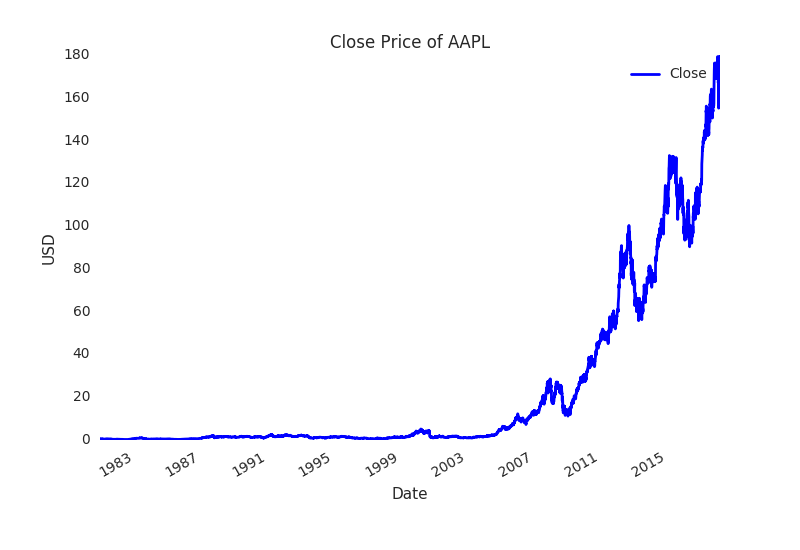

In [7]:
ax = df2.plot(x='Date', y='Close', style='b-', grid=True, linewidth = 2)
ax.set_xlabel("Date")
ax.set_ylabel("USD")
ax.set_title("Close Price of AAPL")
display()

In [8]:
# fill NA row
df2.iloc[165,:] = df2.iloc[164,:]
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9391 entries, 0 to 9390
Data columns (total 6 columns):
Date 9391 non-null datetime64[ns]
Close 9391 non-null float32
Volume 9391 non-null float64
Low 9391 non-null float32
High 9391 non-null float32
sp 9391 non-null float32
dtypes: datetime64[ns](1), float32(4), float64(1)
memory usage: 366.8 KB

In [9]:
# prepare data for Linear Regression: create labels of 1 day horizon; 1 week horizon; 1 month horizon; 4 mongths horizon
df3 = df1
w = Window().partitionBy().orderBy(col("Date"))

df3 = df3.withColumn("prediction_1D", F.lag(df3.Close).over(w))
df3 = df3.withColumn("prediction_1W", F.lag(df3.Close,5).over(w))
df3 = df3.withColumn("prediction_1M", F.lag(df3.Close,26).over(w))
df3 = df3.withColumn("prediction_4M", F.lag(df3.Close,104).over(w)).na.drop()

display(df3)

Date,Close,Volume,Low,High,sp,prediction_1D,prediction_1W,prediction_1M,prediction_4M
1981-05-13T00:00:00.000+0000,0.486607,1226400,0.486607,0.493304,130.55,0.488839,0.488839,0.464286,0.513393
1981-05-14T00:00:00.000+0000,0.479911,1232000,0.479911,0.484375,131.28,0.486607,0.495536,0.459821,0.486607
1981-05-15T00:00:00.000+0000,0.491071,1226400,0.491071,0.497768,132.17,0.479911,0.5,0.482143,0.450893
1981-05-18T00:00:00.000+0000,0.5,1041600,0.5,0.504464,132.54,0.491071,0.488839,0.491071,0.462054
1981-05-19T00:00:00.000+0000,0.491071,6356000,0.491071,0.493304,132.09,0.5,0.488839,0.497768,0.475446
1981-05-20T00:00:00.000+0000,0.506696,3320800,0.506696,0.511161,132.0,0.491071,0.486607,0.497768,0.504464
1981-05-21T00:00:00.000+0000,0.535714,8052800,0.535714,0.537946,131.75,0.506696,0.479911,0.497768,0.529018
1981-05-22T00:00:00.000+0000,0.560268,7856800,0.560268,0.564732,131.33,0.535714,0.491071,0.473214,0.551339
1981-05-26T00:00:00.000+0000,0.558036,21336000,0.558036,0.560268,132.77,0.560268,0.5,0.446429,0.580357
1981-05-27T00:00:00.000+0000,0.589286,37374400,0.589286,0.591518,133.77,0.558036,0.491071,0.459821,0.633929


In [10]:
# Split data into 80% training data and 20% testing data
df3lr = df3.toPandas()
trainlr = df3lr[:7500]
validlr= df3lr[7500:]

# Convert Pandas Dataframe to spark Dataframe
# spark_trainlr = sqlContext.createDataFrame(trainlr)
# spark_validlr = sqlContext.createDataFrame(validlr)
spark_df3 = sqlContext.createDataFrame(df3lr).select('High', 'Volume', 'Close', 'Date', 'Low', 'sp', 'prediction_1D', 'prediction_1W', 'prediction_1M', 'prediction_4M')

In [11]:
#Encoding features into single column
assembler1 = VectorAssembler().setInputCols(( 'High', 'Volume', 'Close', 'Low', 'sp')).setOutputCol("features").transform(spark_df3)

In [12]:
# Split data into 80% training data and 20% testing data
assemblertrain = sqlContext.createDataFrame(assembler1.take(7500))
assemblervalid = sqlContext.createDataFrame(assembler1.toPandas()[7500:])
assemblervalid

Out[ 44 ]: DataFrame[High: double, Volume: bigint, Close: double, Date: timestamp, Low: double, sp: double, prediction_1D: double, prediction_1W: double, prediction_1M: double, prediction_4M: double, features: vector]

In [13]:
# Define LinearRegression algorithm
lr = LinearRegression().setLabelCol("prediction_1W").setFeaturesCol("features").setMaxIter(10).setRegParam(0.1).setElasticNetParam(0.5)

In [14]:
# Fit model
model = lr.fit(assemblertrain)

In [15]:
# Make Prediction
predictions_1W = model.transform(assemblervalid).select("features", "prediction_1W", "prediction").toPandas()

In [16]:
display(predictions_1W)

features,prediction_1W,prediction
"List(1, 5, List(), List(51.28571319580078, 1.206863E8, 51.165714263916016, 50.69571304321289, 1320.8800048828125))",49.18857192993164,50.14052599634601
"List(1, 5, List(), List(51.42856979370117, 2.321375E8, 50.6485710144043, 49.71428680419922, 1321.8699951171875))",49.06285858154297,49.7565512612862
"List(1, 5, List(), List(51.11428451538086, 9.18932E7, 50.978572845458984, 50.505714416503906, 1329.1500244140625))",49.5,49.9453540131957
"List(1, 5, List(), List(51.354286193847656, 7.76041E7, 51.31142807006836, 50.95857238769531, 1332.3199462890625))",50.26856994628906,50.273211074957224
"List(1, 5, List(), List(51.424285888671875, 7.10437E7, 51.41428756713867, 51.07857131958008, 1328.010009765625))",50.74285888671875,50.36542274740603
"List(1, 5, List(), List(52.128570556640625, 1.202894E8, 51.87571334838867, 51.5, 1336.3199462890625))",51.165714263916016,50.91084810478758
"List(1, 5, List(), List(51.46714401245117, 1.326458E8, 51.18571472167969, 50.931427001953125, 1340.4300537109375))",50.6485710144043,50.290294959669986
"List(1, 5, List(), List(51.35714340209961, 2.040143E8, 50.08000183105469, 49.931427001953125, 1343.010009765625))",50.978572845458984,49.604098856088164
"List(1, 5, List(), List(49.342857360839844, 2.181389E8, 48.37285614013672, 48.2457160949707, 1315.43994140625))",51.31142807006836,47.84488093225622
"List(1, 5, List(), List(49.23428726196289, 1.679636E8, 48.94571304321289, 48.37285614013672, 1307.4000244140625))",51.41428756713867,48.01049654483533


In [17]:
SMAPE_lr_1D = 100/len(np.array(predictions_1D.prediction_1D)) * np.sum(2 * np.abs(np.array(predictions_1D.prediction) - np.array(predictions_1D.prediction_1D)) / (np.abs(np.array(predictions_1D.prediction_1D)) + np.abs(np.array(predictions_1D.prediction))))
SMAPE_lr_1D
# 1.264373670726171

Out[ 104 ]: 1.1101461079411141

In [18]:
SMAPE_lr_1W = 100/len(np.array(predictions_1W.prediction_1W)) * np.sum(2 * np.abs(np.array(predictions_1W.prediction) - np.array(predictions_1W.prediction_1W)) / (np.abs(np.array(predictions_1W.prediction_1W)) + np.abs(np.array(predictions_1W.prediction))))
SMAPE_lr_1W
#  2.9425125667408776

Out[ 109 ]: 2.909696102996621

In [19]:
SMAPE_lr_1M = 100/len(np.array(predictions_1M.prediction_1M)) * np.sum(2 * np.abs(np.array(predictions_1M.prediction) - np.array(predictions_1M.prediction_1M)) / (np.abs(np.array(predictions_1M.prediction_1M)) + np.abs(np.array(predictions_1M.prediction))))
SMAPE_rf_1M
# 7.4907624599217835

Out[ 97 ]: 7.4907624599217835

In [20]:
SMAPE_lr_4M = 100/len(np.array(predictions_4M.prediction_4M)) * np.sum(2 * np.abs(np.array(predictions_4M.prediction) - np.array(predictions_4M.prediction_4M)) / (np.abs(np.array(predictions_4M.prediction_4M)) + np.abs(np.array(predictions_4M.prediction))))
SMAPE_lr_4M
# 17.381633733951695

Out[ 94 ]: 17.381633733951695

In [21]:
list_of_tuples = list(zip(df3lr[7500:].Date, predictions_1D.prediction,predictions_1W.prediction,predictions_1M.prediction,predictions_4M.prediction,df3lr[7500:].Close))

# Converting lists of tuples into pandas Dataframe. 
dflr_display = pd.DataFrame(list_of_tuples, columns = ['Date', 'Prediction_1D','Prediction_1W','Prediction_1M','Prediction_4M','Close']) 
dflr_display_spark = sqlContext.createDataFrame(dflr_display)
display(dflr_display_spark.take(5))


Date,Prediction_1D,Prediction_1W,Prediction_1M,Prediction_4M,Close
2011-02-09T00:00:00.000+0000,50.655521229109326,50.14052599634601,50.655521229109326,40.782032248621015,51.165714263916016
2011-02-10T00:00:00.000+0000,50.202909533130104,49.7565512612862,50.202909533130104,41.02701183669777,50.6485710144043
2011-02-11T00:00:00.000+0000,50.47413023584203,49.9453540131957,50.47413023584203,40.48302054134363,50.978572845458984
2011-02-14T00:00:00.000+0000,50.814041090004174,50.273211074957224,50.814041090004174,40.674611264961364,51.31142807006836
2011-02-15T00:00:00.000+0000,50.91103804825401,50.36542274740603,50.91103804825401,40.71725025570862,51.41428756713867


In [22]:
# Prepare Data For Random Forest
# Prepare features of Random Forest

features = pd.DataFrame(df2["Close"].rolling(window=2).mean())
features.columns = ['sma_2']
features['sma_5'] = pd.DataFrame(df2["Close"].rolling(window=5).mean())
features['sma_10'] = pd.DataFrame(df2["Close"].rolling(window=10).mean())
features['26_ema'] = pd.ewma(df2["Close"], span=26)
features['12_ema'] = pd.ewma(df2["Close"], span=12)
features['MACD'] = features['12_ema'] - features['26_ema']
features['pct_change'] = df2.Volume.pct_change(periods=4)
features['zscore'] = pd.DataFrame((df2['Close']-df2['Close'].rolling(window=26).mean())/df2['Close'].rolling(window=26).std())
features['percentile'] = pd.DataFrame(df2.Volume.rolling(26,min_periods=20).apply(lambda x: pd.Series(x).rank(pct=True)[0]))
features['lag_1'] = df2['Close'].shift(1)
features['lag_5'] = df2['Close'].shift(5)
features['lag_26'] = df2['Close'].shift(26)
features['loss'] = df2['Close'] - df2['Close'].shift(-1)
features['loss_5'] = df2['Close'] - df2['Close'].shift(-5)
features['momentum']= ta.momentum.money_flow_index(df2.High, df2.Low, df2.Close, df2.Volume, n=10, fillna=False)
features['momentum2'] = features['momentum'] - features['momentum'].rolling(window=26).mean()
features['sign'] = features['pct_change'].apply(np.sign)
features['plus_minus'] = features['sign'].rolling(window=20).sum()
features['Date'] = df2['Date']
features['dayofweek'] = features['Date'].dt.dayofweek
features['quarter'] = features['Date'].dt.quarter
features['month'] = features['Date'].dt.month
features['year'] = features['Date'].dt.year
features['dayofyear'] = features['Date'].dt.dayofyear
features['dayofmonth'] = features['Date'].dt.day
features['weekofyear'] = features['Date'].dt.weekofyear
features['sp'] = df2['sp']
features = features.dropna()
features['Close'] = df2.Close
df4=features
df4['prediction_1D'] = df4['Close'].shift(-1)
df4['prediction_1W'] = df4['Close'].shift(-5)
df4['prediction_1M'] = df4['Close'].shift(-26)
df4['prediction_4M'] = df4['Close'].shift(-104)
df4= df4.dropna()
df4.info()

/local_disk0/tmp/1554323931840-0/PythonShell.py:8: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,span=26,min_periods=0).mean()
 import signal
/local_disk0/tmp/1554323931840-0/PythonShell.py:9: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,span=12,min_periods=0).mean()
 import six.moves.queue
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9248 entries, 34 to 9281
Data columns (total 32 columns):
sma_2 9248 non-null float64
sma_5 9248 non-null float64
sma_10 9248 non-null float64
26_ema 9248 non-null float64
12_ema 9248 non-null float64
MACD 9248 non-null float64
pct_change 9248 non-null float64
zscore 9248 non-null float64
percentile 9248 non-null float64
lag_1 9248 non-null float32
lag_5 9248 non-null float32
lag_26 9248 non-null float32
loss 9248 non-null float32
loss_5 9248 non-null float32
momentum 9248 non-null float64
momentum2 9248 non-null float64
sign 9248 non-null float64
plus_minus 9248 non-null float64
Date 9248 non-null datetime64[ns]
dayofweek 9248 non-null int64
quarter 9248 non-null int64
month 9248 non-null int64
year 9248 non-null int64
dayofyear 9248 non-null int64
dayofmonth 9248 non-null int64
weekofyear 9248 non-null int64
sp 9248 non-null float32
Close 9248 non-null float32
prediction_1D 9248 non-null float32
prediction_1W 9248 non-null float32
prediction_1M 9248 non-null float32
prediction_4M 9248 non-null float32
dtypes: datetime64[ns](1), float32(11), float64(13), int64(7)
memory usage: 1.9 MB

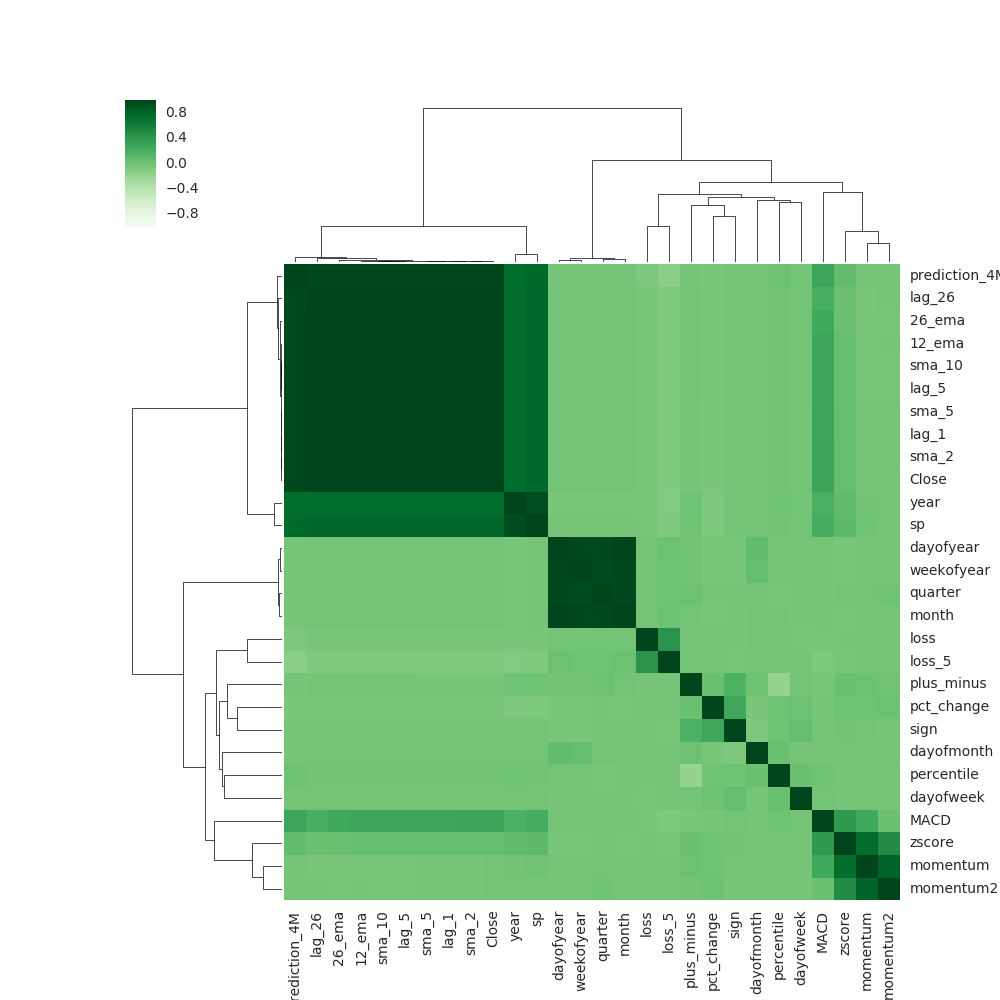

In [23]:
# Cofusion Matrix Feature Selection
from sklearn.preprocessing import StandardScaler,Normalizer
from scipy.cluster import hierarchy
from scipy.spatial import distance

corr_df = df4.drop(['prediction_1D','prediction_1W','prediction_1M','Date'],axis=1)
corr = corr_df.corrwith(df4.prediction_1D)
corr_matrix = features.drop(['prediction_1D','prediction_1M','prediction_1W'],axis=1).corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
display()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

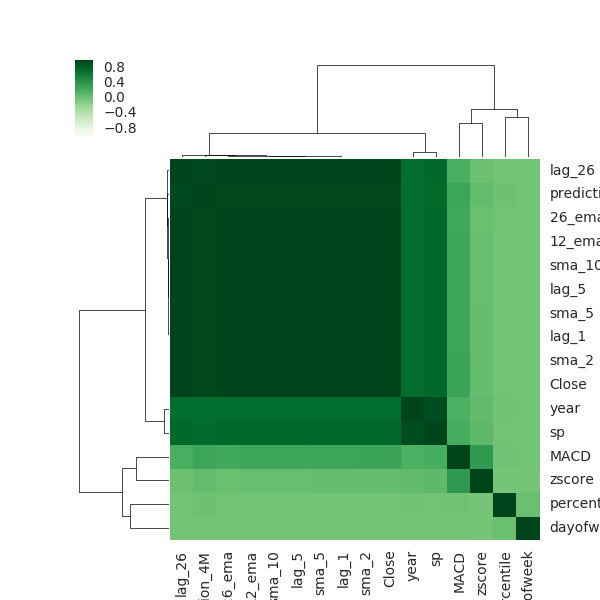

In [24]:
correlated_features = corr[corr>0].index.tolist()
corr_matrix = features[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
display()

In [25]:
label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0].sort_values(ascending=False))

Correlation Strength:
Close 0.999839
sma_2 0.999796
lag_1 0.999673
sma_5 0.999649
12_ema 0.999436
sma_10 0.999393
lag_5 0.999057
26_ema 0.998839
lag_26 0.995352
prediction_4M 0.982914
sp 0.762350
year 0.735648
MACD 0.277610
zscore 0.071929
percentile 0.023299
dayofweek 0.000955
dtype: float64

In [26]:
# MI Score: Feature Importance
import sklearn
import sklearn.metrics as metrics
from sklearn.feature_selection import mutual_info_regression,  f_regression


def getMI(df):
    df_f = df.drop(['prediction_1M','prediction_1D','prediction_1W','prediction_4M','Date'], axis =1)
    feature_names = np.array(df_f.columns)
    miScore = mutual_info_regression(df_f[feature_names], df["prediction_1M"])
    d = {'Feature': feature_names, 'MI_Score': miScore}
    miScoredf = pd.DataFrame(d).sort_values(by = 'MI_Score',ascending=False)
    return miScoredf


MI_train = df4[:7500]
MIdf = sqlContext.createDataFrame(getMI(MI_train))
display(MIdf)

Feature,MI_Score
26_ema,2.2003722060716098
12_ema,2.1901509420760568
sma_10,2.134993802436249
sma_5,2.121582434375692
sma_2,2.070831971136055
Close,2.0315980124729696
lag_1,2.015474138747881
lag_5,1.955633731010876
year,1.8388607519218323
lag_26,1.8212479066668301


In [27]:
spark_df4 = sqlContext.createDataFrame(df4)
spark_df4rf = spark_df4.select('sma_2','sma_5','sma_10','26_ema','12_ema','MACD','pct_change','zscore','percentile','lag_1','lag_5','loss','momentum','momentum2','plus_minus',
                               'dayofweek','quarter','month','weekofyear','sp','Close','prediction_1D')

trainrf = df4[:7500]
validrf= df4[7500:]

# Convert Pandas Dataframe to spark Dataframe
spark_train = sqlContext.createDataFrame(trainrf)
spark_valid = sqlContext.createDataFrame(validrf)
spark_trainrf = spark_train.select('sma_2','sma_5','sma_10','26_ema','12_ema','MACD','pct_change','zscore','percentile','lag_1','lag_5','loss',
                                 'momentum','momentum2','plus_minus','dayofweek','quarter','month','sp','Close','prediction_1D')

spark_validrf = spark_valid.select('sma_2','sma_5','sma_10','26_ema','12_ema','MACD','pct_change','zscore','percentile','lag_1','lag_5','loss','momentum','momentum2',
                                   'plus_minus','dayofweek','quarter','month','sp','Close','prediction_1D')

In [28]:
display(spark_validrf)

sma_2,sma_5,sma_10,26_ema,12_ema,MACD,pct_change,zscore,percentile,lag_1,lag_5,loss,momentum,momentum2,plus_minus,dayofweek,quarter,month,sp,Close,prediction_1D
44.02214241027832,44.16714248657227,43.99399948120117,42.176652603132226,43.552271415414864,1.3756188122826387,-0.6816457708730808,1.1859849916640877,0.6538461538461539,43.924285888671875,45.42856979370117,0.11285781860351562,68.78421696215587,-2.892521591822913,-2.0,0,4,10,1185.6199951171875,44.119998931884766,44.00714111328125
44.06357002258301,44.125999450683594,44.129856491088866,42.312244344624744,43.62225136893277,1.3100070243080282,-0.45549291293365357,1.0336617479465706,0.6923076923076923,44.119998931884766,44.21285629272461,0.03142547607421875,62.31669734409853,-8.682539649248966,-4.0,1,4,10,1185.6400146484375,44.00714111328125,43.97571563720703
43.99142837524414,44.04885711669922,44.23971366882324,42.435464440371575,43.67663048712881,1.241166046757236,-0.2764610307184565,0.9396251282644154,0.5769230769230769,44.00714111328125,44.361427307128906,0.37000274658203125,54.99426716843231,-14.749887497652459,-4.0,2,4,10,1182.449951171875,43.97571563720703,43.605712890625
43.790714263916016,43.926570892333984,44.28157081604004,42.52214951076072,43.665720087666685,1.1435705769059652,0.4782288654373381,0.6510840987226755,0.8461538461538461,43.97571563720703,44.21714401245117,0.6085700988769531,47.629745488908505,-20.56638206904322,-4.0,3,4,10,1183.780029296875,43.605712890625,42.99714279174805
43.30142784118652,43.74114227294922,44.08499946594238,42.557334198241264,43.56286204214074,1.005527843899479,0.09695002318695822,0.22695302497247719,0.6923076923076923,43.605712890625,43.924285888671875,-0.4571418762207031,36.44200385614659,-29.742355182388685,-2.0,4,4,10,1183.260009765625,42.99714279174805,43.45428466796875
43.2257137298584,43.60799942016602,43.88757095336914,42.62377497377663,43.546157830729676,0.9223828569530497,0.07879172248667454,0.4792817958519611,0.5,42.99714279174805,44.119998931884766,-0.7400016784667969,28.213340149383413,-35.6196325902082,0.0,0,4,11,1184.3800048828125,43.45428466796875,44.19428634643555
43.82428550720215,43.64542846679687,43.88571395874023,42.74010914952914,43.64586991006904,0.9057607605398985,0.08753622781594506,0.8854101834964452,0.9230769230769231,43.45428466796875,44.00714111328125,-0.4914283752441406,42.36364728954623,-19.976274945410815,0.0,1,4,11,1193.5699462890625,44.19428634643555,44.68571472167969
44.44000053405762,43.787428283691405,43.91814270019531,42.88422808079955,43.805846034932216,0.9216179541326639,-0.07749334363122706,1.111481008576916,0.5,44.19428634643555,43.97571563720703,-0.7814292907714844,39.59659874479542,-21.679358922331105,0.0,2,4,11,1197.9599609375,44.68571472167969,45.46714401245117
45.07642936706543,44.15971450805664,44.04314270019531,43.075555186847815,44.0614303391659,0.9858751523180871,0.4923839379788493,1.4795349520634886,0.8461538461538461,44.68571472167969,43.605712890625,0.1628570556640625,53.21229629484818,-7.510397293437748,2.0,3,4,11,1221.06005859375,45.46714401245117,45.30428695678711
45.38571548461914,44.62114334106445,44.181142807006836,43.24064642906554,44.25263904956917,1.0119926205036265,-0.14776502916328138,1.2901358211489804,0.5,45.46714401245117,42.99714279174805,-0.21285629272460938,53.21152756089534,-7.33832128878452,0.0,4,4,11,1225.8499755859375,45.30428695678711,45.51714324951172


In [29]:
# Feature Encoding: One Hot Encoding and Vector Assembler

# One Hot Encoding
encoder = OneHotEncoderEstimator(inputCols=['dayofweek','quarter','month'],outputCols=['dayofweek_index','quarter_index','month_index']).fit(spark_df4rf)
spark_df4rf = encoder.transform(spark_df4rf)
#VectorAssembler
num_columns = ['sma_2','sma_5','sma_10','26_ema','12_ema','MACD','pct_change','zscore','percentile','lag_1','lag_5','loss','momentum','momentum2','plus_minus','sp']
vectorAssembler = VectorAssembler(inputCols=num_columns, outputCol="features")

In [30]:
#Define random forest algorithm
rfr = RandomForestRegressor().setLabelCol("prediction_1D").setFeaturesCol("features").setNumTrees(40).setMaxDepth(20)

In [31]:
# Create Pipeline
pipeline = Pipeline().setStages((vectorAssembler, rfr))
pipeline.getStages()

Out[ 25 ]: (VectorAssembler_f92883dc823a, RandomForestRegressor_7f00b20efa61)

In [32]:
# vectorized train and test set
trainrf = spark_df4rf.toPandas()[:7500]
validrf= spark_df4rf.toPandas()[7500:]

# Convert Pandas Dataframe to spark Dataframe
spark_train = sqlContext.createDataFrame(trainrf)
spark_valid = sqlContext.createDataFrame(validrf)

In [33]:
pipelineModel = pipeline.fit(spark_train)

In [34]:
# Pyspark Feature Selection
rfrm = pipelineModel.stages[-1] # Our model is in the last stage of the model

# Zip the list of features with their scores
scores = list(zip(num_columns, rfrm.featureImportances))

# Print
for x in scores: 
  print(x)
SparkFeatureImportancepd = pd.DataFrame(scores, columns = ['Features', 'Feature Importance'])
SparkFeatureImportance = sqlContext.createDataFrame(SparkFeatureImportancepd)
display(SparkFeatureImportance)

Features,Feature Importance
sma_2,0.26356025707773223
sma_5,0.14141967075912626
sma_10,0.07079929219770731
26_ema,0.08565429865533161
12_ema,0.17666969850207334
MACD,0.0023876092942895976
pct_change,9.027212541862396E-4
zscore,0.0012726056524092967
percentile,0.001463415862680495
lag_1,0.24054043984280296


In [35]:
# Using the model, create our predictions from the test data
predictionsDFrf = pipelineModel.transform(spark_valid)

display(predictionsDFrf).take(20)

sma_2,sma_5,sma_10,26_ema,12_ema,MACD,pct_change,zscore,percentile,lag_1,lag_5,loss,momentum,momentum2,plus_minus,dayofweek,quarter,month,weekofyear,sp,Close,prediction_1D,dayofweek_index,quarter_index,month_index,features,prediction
44.07071495056152,44.428856658935544,43.80142822265625,42.02118489683202,43.44904823060215,1.4278633337701336,-0.6589439006458124,1.1459728717040538,0.5384615384615384,44.21714401245117,44.96285629272461,-0.19571304321289062,68.85704240526971,-3.217202180754569,-2.0,4,4,10,42,1183.0799560546875,43.924285888671875,44.119998931884766,"List(0, 4, List(), List())","List(0, 4, List(), List())","List(0, 12, List(10), List(1.0))","List(1, 16, List(), List(44.07071495056152, 44.428856658935544, 43.80142822265625, 42.02118489683202, 43.44904823060215, 1.4278633337701336, -0.6589439006458124, 1.1459728717040538, 0.5384615384615384, 44.21714401245117, 44.96285629272461, -0.19571304321289062, 68.85704240526971, -3.217202180754569, -2.0, 1183.0799560546875))",35.80122323036194
44.02214241027832,44.16714248657227,43.99399948120117,42.176652603132226,43.552271415414864,1.3756188122826387,-0.6816457708730808,1.1859849916640877,0.6538461538461539,43.924285888671875,45.42856979370117,0.11285781860351562,68.78421696215587,-2.89252159182287,-2.0,0,4,10,43,1185.6199951171875,44.119998931884766,44.00714111328125,"List(0, 4, List(0), List(1.0))","List(0, 4, List(), List())","List(0, 12, List(10), List(1.0))","List(1, 16, List(), List(44.02214241027832, 44.16714248657227, 43.99399948120117, 42.176652603132226, 43.552271415414864, 1.3756188122826387, -0.6816457708730808, 1.1859849916640877, 0.6538461538461539, 43.924285888671875, 45.42856979370117, 0.11285781860351562, 68.78421696215587, -2.89252159182287, -2.0, 1185.6199951171875))",36.75822319984436
44.06357002258301,44.125999450683594,44.129856491088866,42.312244344624744,43.62225136893277,1.3100070243080282,-0.45549291293365357,1.0336617479465706,0.6923076923076923,44.119998931884766,44.21285629272461,0.03142547607421875,62.31669734409853,-8.682539649248938,-4.0,1,4,10,43,1185.6400146484375,44.00714111328125,43.97571563720703,"List(0, 4, List(1), List(1.0))","List(0, 4, List(), List())","List(0, 12, List(10), List(1.0))","List(1, 16, List(), List(44.06357002258301, 44.125999450683594, 44.129856491088866, 42.312244344624744, 43.62225136893277, 1.3100070243080282, -0.45549291293365357, 1.0336617479465706, 0.6923076923076923, 44.119998931884766, 44.21285629272461, 0.03142547607421875, 62.31669734409853, -8.682539649248938, -4.0, 1185.6400146484375))",37.2995177189509
43.99142837524414,44.04885711669922,44.23971366882324,42.435464440371575,43.67663048712881,1.241166046757236,-0.2764610307184565,0.9396251282644154,0.5769230769230769,44.00714111328125,44.361427307128906,0.37000274658203125,54.99426716843231,-14.74988749765243,-4.0,2,4,10,43,1182.449951171875,43.97571563720703,43.605712890625,"List(0, 4, List(2), List(1.0))","List(0, 4, List(), List())","List(0, 12, List(10), List(1.0))","List(1, 16, List(), List(43.99142837524414, 44.04885711669922, 44.23971366882324, 42.435464440371575, 43.67663048712881, 1.241166046757236, -0.2764610307184565, 0.9396251282644154, 0.5769230769230769, 44.00714111328125, 44.361427307128906, 0.37000274658203125, 54.99426716843231, -14.74988749765243, -4.0, 1182.449951171875))",37.735934225718175
43.790714263916016,43.926570892333984,44.28157081604004,42.52214951076072,43.665720087666685,1.1435705769059652,0.4782288654373381,0.6510840987226755,0.8461538461538461,43.97571563720703,44.21714401245117,0.6085700988769531,47.629745488908505,-20.56638206904318,-4.0,3,4,10,43,1183.780029296875,43.605712890625,42.99714279174805,"List(0, 4, List(3), List(1.0))","List(0, 4, List(), List())","List(0, 12, List(10), List(1.0))","List(1, 16, List(), List(43.790714263916016, 43.926570892333984, 44.28157081604004, 42.52214951076072, 43.665720087666685, 1.1435705769059652, 0.4782288654373381, 0.6510840987226755, 0.8461538461538461, 43.97571563720703, 44.2171440

In [36]:
predictionsPDrf = predictionsDFrf.toPandas()
SMAPE_rf = 100/len(np.array(predictionsPDrf.prediction_1D)) * np.sum(2 * np.abs(np.array(predictionsPDrf.prediction) - np.array(predictionsPDrf.prediction_1D)) / (np.abs(np.array(predictionsPDrf.prediction_1D)) + np.abs(np.array(predictionsPDrf.prediction))))
SMAPE_rf

#1 day smape: 8.182635590249

Out[ 29 ]: 8.200054925879556

In [37]:
paramGrid = (ParamGridBuilder()
            .addGrid(rfr.maxDepth, [2, 5, 10,30])
            .addGrid(rfr.numTrees, [5, 15, 50,100])
            .addGrid(rfr.featureSubsetStrategy,['auto','sqrt'])
            .addGrid(rfr.maxBins,[2,50,100])
            .addGrid(rfr.impurity,['variance'])
            .build())

In [38]:
evaluator = (RegressionEvaluator()
  .setLabelCol("prediction_1D")
  .setPredictionCol("prediction"))

cv = (CrossValidator()
         .setEstimator(pipeline)
         .setEvaluator(evaluator)
         .setEstimatorParamMaps(paramGrid)
         .setNumFolds(3))

In [39]:
cvModel = cv.fit(spark_trainrf)

In [40]:
# Using the model, create our predictions from the test data
finalPredictionsDF_1D = cvModel.transform(spark_validrf)

In [41]:
SMAPE_rf = 100/len(np.array(predictions.prediction_1W)) * np.sum(2 * np.abs(np.array(predictions.prediction) - np.array(predictions.prediction_1W)) / (np.abs(np.array(predictions.prediction_1W)) + np.abs(np.array(predictions.prediction))))
SMAPE_rf

In [42]:
#dataframe prediction 
list_of_tuples = list(zip(df4[7500:].Date, finalPredictionsDF_1D.prediction_1D,finalPredictionsDF_1W.prediction_1W, finalPredictionsDF_1M.prediction_1M,finalPredictionsDF_4M.prediction_4M,df4[7500:].Close))

# Converting lists of tuples into 
# pandas Dataframe. 
dfrf_display = pd.DataFrame(list_of_tuples, columns = ['Date', 'Prediction_1D','Prediction_1W','Prediction_1M','Prediction_4M','Close']) 
dfrf_display.plot(x='Date', kind ='line')

# Write Frame out as Table
dfrf_display.write.csv("output/rf1.csv")